# Import Libraries

In [1]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Tue Mar 17 17:40:10 2020


In [2]:
import src.dataset.dataset as dst
import src.dataset.dataloader as dl
# import src.preprocessing.pytorchtransforms as preprocessing
import src.preprocessing.albumentationstransforms as preprocessing
import src.utils.utils as utils
import src.models.train_model as train
import src.visualization.plotdata as plotdata
import src.preprocessing.customcompose as customcompose

%config IPCompleter.greedy=True
%reload_ext autoreload


In [3]:
%autoreload 2  # Autoreload all modules

In [4]:
def printgpuinfo():
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
      print('and then re-execute this cell.')
    else:
      print(gpu_info)

In [5]:
def showsysteminfo():
    from psutil import virtual_memory
    ram_gb = virtual_memory().total / 1e9
    print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

    if ram_gb < 20:
      print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
      print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
      print('re-execute this cell.')
    else:
      print('You are using a high-RAM runtime!')

In [6]:
import torch
print(torch.__version__)

1.4.0


In [7]:
# mean,std= utils.Utils.calculatemeanandstddeviation()
# print("mean: " + str(mean))
# print("std: " + str(std))
mean=[0.5,0.5,0.5]
std=[0.5,0.5,0.5]
preproc = preprocessing.AlbumentaionsTransforms()
train_transforms = preproc.gettraintransforms(mean,std)
test_transforms = preproc.gettesttransforms(mean,std)
compose_train = customcompose.CustomCompose(train_transforms)
compose_test = customcompose.CustomCompose(test_transforms)

In [8]:
ds = dst.Dataset()
train_dataset = ds.gettraindataset(compose_train)
test_dataset = ds.gettestdataset(compose_test)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
batch_size = 64
dataloader = dl.Cifar10Dataloader(traindataset=train_dataset, testdataset=test_dataset,batch_size=batch_size)
train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

CUDA Available? True
64


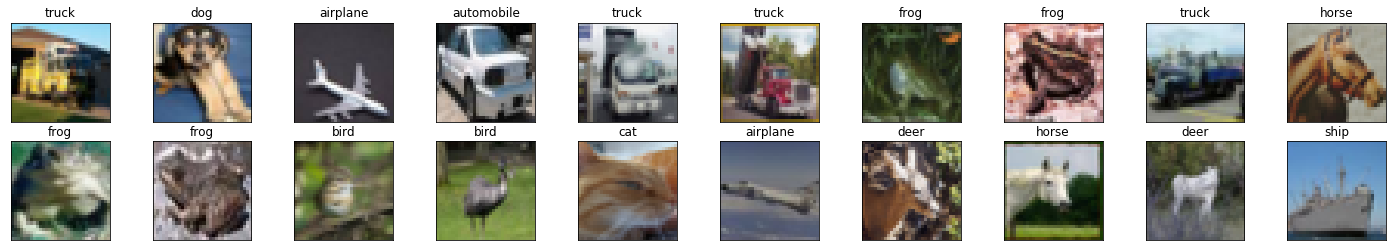

In [10]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

#TODO show transformed images fom dataset
dataiterator = iter(train_loader)
plotdata.PlotData.showImagesfromdataset(dataiterator,classes=classes)

In [11]:
cnn_model, device = utils.Utils.createmodelresnet18()
train_model = train.TrainModel()
train_model.showmodelsummary(cnn_model)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [12]:
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.1, momentum=0.9, weight_decay=0.0001)
# scheduler = utils.Utils.createscheduler(optimizer, mode='max', factor=0.1, patience=4,
#                                         verbose=True)
scheduler = utils.Utils.createschedulersteplr(optimizer, step_size=25, gamma=0.5)

In [13]:
lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
epochs = 75
for epoch in range(1, epochs+1):
    print("EPOCH:", epoch)
    train_model.train(cnn_model, device, train_loader, optimizer, 1)
    t_acc_epoch = train_model.test(cnn_model, device, test_loader, class_correct=class_correct,
                                   class_total=class_total, epoch=epoch)
    scheduler.step(epoch)
    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


/home/abhijit/.virtualenvs/dl4cv/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Loss=1.7339507341384888 Batch_id=781 Accuracy=36.26: 100%|██████████| 782/782 [01:18<00:00,  9.99it/s]



Test set: Average loss: 0.0218, Accuracy: 4851/10000 (48.51%)

Validation accuracy increased (0.000000 --> 48.510000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.1  for epoch:  2
EPOCH: 2


Loss=1.293923258781433 Batch_id=781 Accuracy=55.25: 100%|██████████| 782/782 [01:54<00:00,  6.84it/s] 



Test set: Average loss: 0.0189, Accuracy: 5694/10000 (56.94%)

Validation accuracy increased (48.510000 --> 56.940000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.1  for epoch:  3
EPOCH: 3


Loss=0.5173887610435486 Batch_id=781 Accuracy=67.47: 100%|██████████| 782/782 [01:58<00:00,  6.58it/s] 



Test set: Average loss: 0.0148, Accuracy: 6772/10000 (67.72%)

Validation accuracy increased (56.940000 --> 67.720000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.1  for epoch:  4
EPOCH: 4


Loss=0.517764687538147 Batch_id=781 Accuracy=75.06: 100%|██████████| 782/782 [01:56<00:00,  6.71it/s]  



Test set: Average loss: 0.0116, Accuracy: 7412/10000 (74.12%)

Validation accuracy increased (67.720000 --> 74.120000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.1  for epoch:  5
EPOCH: 5


Loss=0.561403751373291 Batch_id=781 Accuracy=80.17: 100%|██████████| 782/782 [01:59<00:00,  6.56it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0151, Accuracy: 7382/10000 (73.82%)

Learning rate = 0.1  for epoch:  6
EPOCH: 6


Loss=0.5914662480354309 Batch_id=781 Accuracy=83.81: 100%|██████████| 782/782 [02:00<00:00,  6.49it/s] 



Test set: Average loss: 0.0099, Accuracy: 7917/10000 (79.17%)

Validation accuracy increased (74.120000 --> 79.170000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.1  for epoch:  7
EPOCH: 7


Loss=0.619914710521698 Batch_id=781 Accuracy=86.98: 100%|██████████| 782/782 [01:57<00:00,  6.64it/s]  



Test set: Average loss: 0.0092, Accuracy: 8066/10000 (80.66%)

Validation accuracy increased (79.170000 --> 80.660000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.1  for epoch:  8
EPOCH: 8


Loss=0.36388182640075684 Batch_id=781 Accuracy=89.66: 100%|██████████| 782/782 [01:57<00:00,  6.68it/s]



Test set: Average loss: 0.0097, Accuracy: 8075/10000 (80.75%)

Validation accuracy increased (80.660000 --> 80.750000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.1  for epoch:  9
EPOCH: 9


Loss=0.05458863079547882 Batch_id=781 Accuracy=91.51: 100%|██████████| 782/782 [02:00<00:00,  6.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 7943/10000 (79.43%)

Learning rate = 0.1  for epoch:  10
EPOCH: 10


Loss=0.13860201835632324 Batch_id=781 Accuracy=93.10: 100%|██████████| 782/782 [02:03<00:00,  6.36it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0129, Accuracy: 7879/10000 (78.79%)

Learning rate = 0.1  for epoch:  11
EPOCH: 11


Loss=0.04527178406715393 Batch_id=781 Accuracy=93.76: 100%|██████████| 782/782 [01:58<00:00,  6.57it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 7965/10000 (79.65%)

Learning rate = 0.1  for epoch:  12
EPOCH: 12


Loss=0.1723155677318573 Batch_id=781 Accuracy=94.70: 100%|██████████| 782/782 [01:56<00:00,  6.71it/s]  



Test set: Average loss: 0.0108, Accuracy: 8076/10000 (80.76%)

Validation accuracy increased (80.750000 --> 80.760000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.1  for epoch:  13
EPOCH: 13


Loss=0.34120064973831177 Batch_id=781 Accuracy=95.39: 100%|██████████| 782/782 [01:59<00:00,  6.54it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0119, Accuracy: 8051/10000 (80.51%)

Learning rate = 0.1  for epoch:  14
EPOCH: 14


Loss=0.3777118921279907 Batch_id=781 Accuracy=95.88: 100%|██████████| 782/782 [01:57<00:00,  6.65it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0133, Accuracy: 7794/10000 (77.94%)

Learning rate = 0.1  for epoch:  15
EPOCH: 15


Loss=0.4929211437702179 Batch_id=781 Accuracy=95.97: 100%|██████████| 782/782 [02:02<00:00,  6.37it/s]  



Test set: Average loss: 0.0111, Accuracy: 8145/10000 (81.45%)

Validation accuracy increased (80.760000 --> 81.450000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.1  for epoch:  16
EPOCH: 16


Loss=0.17183613777160645 Batch_id=781 Accuracy=96.27: 100%|██████████| 782/782 [01:55<00:00,  6.80it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0135, Accuracy: 7868/10000 (78.68%)

Learning rate = 0.1  for epoch:  17
EPOCH: 17


Loss=0.28640156984329224 Batch_id=781 Accuracy=96.33: 100%|██████████| 782/782 [01:59<00:00,  6.57it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0133, Accuracy: 7903/10000 (79.03%)

Learning rate = 0.1  for epoch:  18
EPOCH: 18


Loss=0.2661885917186737 Batch_id=781 Accuracy=96.44: 100%|██████████| 782/782 [01:55<00:00,  6.77it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0120, Accuracy: 7921/10000 (79.21%)

Learning rate = 0.1  for epoch:  19
EPOCH: 19


Loss=0.1781548261642456 Batch_id=781 Accuracy=96.66: 100%|██████████| 782/782 [01:54<00:00,  6.84it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0117, Accuracy: 8071/10000 (80.71%)

Learning rate = 0.1  for epoch:  20
EPOCH: 20


Loss=0.009784460067749023 Batch_id=781 Accuracy=96.72: 100%|██████████| 782/782 [01:54<00:00,  6.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0119, Accuracy: 8074/10000 (80.74%)

Learning rate = 0.1  for epoch:  21
EPOCH: 21


Loss=0.024006009101867676 Batch_id=781 Accuracy=97.14: 100%|██████████| 782/782 [02:01<00:00,  6.43it/s]



Test set: Average loss: 0.0115, Accuracy: 8166/10000 (81.66%)

Validation accuracy increased (81.450000 --> 81.660000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.1  for epoch:  22
EPOCH: 22


Loss=0.2454276978969574 Batch_id=781 Accuracy=96.95: 100%|██████████| 782/782 [01:59<00:00,  6.53it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0139, Accuracy: 7733/10000 (77.33%)

Learning rate = 0.1  for epoch:  23
EPOCH: 23


Loss=0.11000290513038635 Batch_id=781 Accuracy=96.73: 100%|██████████| 782/782 [02:04<00:00,  6.30it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0120, Accuracy: 8086/10000 (80.86%)

Learning rate = 0.1  for epoch:  24
EPOCH: 24


Loss=0.1061769425868988 Batch_id=781 Accuracy=96.95: 100%|██████████| 782/782 [02:04<00:00,  6.29it/s]   
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0133, Accuracy: 7986/10000 (79.86%)

Learning rate = 0.1  for epoch:  25
EPOCH: 25


Loss=0.31379640102386475 Batch_id=781 Accuracy=96.96: 100%|██████████| 782/782 [02:08<00:00,  6.10it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0117, Accuracy: 8084/10000 (80.84%)

Learning rate = 0.05  for epoch:  26
EPOCH: 26


Loss=0.5217434167861938 Batch_id=781 Accuracy=99.42: 100%|██████████| 782/782 [02:01<00:00,  6.44it/s]   



Test set: Average loss: 0.0100, Accuracy: 8527/10000 (85.27%)

Validation accuracy increased (81.660000 --> 85.270000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.05  for epoch:  27
EPOCH: 27


Loss=0.003813415765762329 Batch_id=781 Accuracy=99.91: 100%|██████████| 782/782 [02:01<00:00,  6.42it/s]  



Test set: Average loss: 0.0098, Accuracy: 8568/10000 (85.68%)

Validation accuracy increased (85.270000 --> 85.680000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.05  for epoch:  28
EPOCH: 28


Loss=0.0012089014053344727 Batch_id=781 Accuracy=99.99: 100%|██████████| 782/782 [01:59<00:00,  6.53it/s]  



Test set: Average loss: 0.0097, Accuracy: 8583/10000 (85.83%)

Validation accuracy increased (85.680000 --> 85.830000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.05  for epoch:  29
EPOCH: 29


Loss=0.01776707172393799 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:55<00:00,  6.76it/s]   



Test set: Average loss: 0.0094, Accuracy: 8609/10000 (86.09%)

Validation accuracy increased (85.830000 --> 86.090000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.05  for epoch:  30
EPOCH: 30


Loss=0.02537021040916443 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:54<00:00,  6.84it/s]   
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0092, Accuracy: 8593/10000 (85.93%)

Learning rate = 0.05  for epoch:  31
EPOCH: 31


Loss=0.003981262445449829 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:54<00:00,  6.84it/s]  



Test set: Average loss: 0.0092, Accuracy: 8610/10000 (86.10%)

Validation accuracy increased (86.090000 --> 86.100000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.05  for epoch:  32
EPOCH: 32


Loss=0.0007728338241577148 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:07<00:00,  6.11it/s] 



Test set: Average loss: 0.0090, Accuracy: 8628/10000 (86.28%)

Validation accuracy increased (86.100000 --> 86.280000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.05  for epoch:  33
EPOCH: 33


Loss=0.0013669133186340332 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:03<00:00,  6.35it/s] 



Test set: Average loss: 0.0088, Accuracy: 8637/10000 (86.37%)

Validation accuracy increased (86.280000 --> 86.370000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.05  for epoch:  34
EPOCH: 34


Loss=0.007367551326751709 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:06<00:00,  6.19it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 8614/10000 (86.14%)

Learning rate = 0.05  for epoch:  35
EPOCH: 35


Loss=0.002008497714996338 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:04<00:00,  6.26it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 8634/10000 (86.34%)

Learning rate = 0.05  for epoch:  36
EPOCH: 36


Loss=0.0007447004318237305 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:06<00:00,  6.16it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 8627/10000 (86.27%)

Learning rate = 0.05  for epoch:  37
EPOCH: 37


Loss=0.00586816668510437 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:07<00:00,  6.14it/s]   
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 8628/10000 (86.28%)

Learning rate = 0.05  for epoch:  38
EPOCH: 38


Loss=0.0035764873027801514 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:05<00:00,  6.23it/s] 



Test set: Average loss: 0.0084, Accuracy: 8642/10000 (86.42%)

Validation accuracy increased (86.370000 --> 86.420000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.05  for epoch:  39
EPOCH: 39


Loss=0.0038151443004608154 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:03<00:00,  6.34it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 8632/10000 (86.32%)

Learning rate = 0.05  for epoch:  40
EPOCH: 40


Loss=0.007784038782119751 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:06<00:00,  6.18it/s]  



Test set: Average loss: 0.0083, Accuracy: 8647/10000 (86.47%)

Validation accuracy increased (86.420000 --> 86.470000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.05  for epoch:  41
EPOCH: 41


Loss=0.04495243728160858 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:05<00:00,  6.23it/s]   
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 8641/10000 (86.41%)

Learning rate = 0.05  for epoch:  42
EPOCH: 42


Loss=0.0007944107055664062 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:06<00:00,  6.20it/s] 



Test set: Average loss: 0.0084, Accuracy: 8652/10000 (86.52%)

Validation accuracy increased (86.470000 --> 86.520000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.05  for epoch:  43
EPOCH: 43


Loss=0.001350998878479004 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:01<00:00,  6.46it/s]  



Test set: Average loss: 0.0084, Accuracy: 8653/10000 (86.53%)

Validation accuracy increased (86.520000 --> 86.530000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.05  for epoch:  44
EPOCH: 44


Loss=0.0002740025520324707 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:01<00:00,  6.46it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 8649/10000 (86.49%)

Learning rate = 0.05  for epoch:  45
EPOCH: 45


Loss=0.002129584550857544 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:54<00:00,  6.84it/s]  



Test set: Average loss: 0.0082, Accuracy: 8657/10000 (86.57%)

Validation accuracy increased (86.530000 --> 86.570000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.05  for epoch:  46
EPOCH: 46


Loss=0.005541294813156128 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:54<00:00,  6.85it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 8651/10000 (86.51%)

Learning rate = 0.05  for epoch:  47
EPOCH: 47


Loss=0.0012254714965820312 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:54<00:00,  6.81it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 8632/10000 (86.32%)

Learning rate = 0.05  for epoch:  48
EPOCH: 48


Loss=0.00986713171005249 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:57<00:00,  6.67it/s]   
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 8643/10000 (86.43%)

Learning rate = 0.05  for epoch:  49
EPOCH: 49


Loss=0.0004279613494873047 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:53<00:00,  6.91it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 8639/10000 (86.39%)

Learning rate = 0.05  for epoch:  50
EPOCH: 50


Loss=0.04179216921329498 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:56<00:00,  6.69it/s]   
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 8640/10000 (86.40%)

Learning rate = 0.025  for epoch:  51
EPOCH: 51


Loss=0.006847858428955078 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:58<00:00,  6.59it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 8627/10000 (86.27%)

Learning rate = 0.025  for epoch:  52
EPOCH: 52


Loss=0.001514732837677002 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:01<00:00,  6.45it/s]  



Test set: Average loss: 0.0081, Accuracy: 8661/10000 (86.61%)

Validation accuracy increased (86.570000 --> 86.610000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.025  for epoch:  53
EPOCH: 53


Loss=0.0011241137981414795 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:59<00:00,  6.54it/s] 



Test set: Average loss: 0.0081, Accuracy: 8664/10000 (86.64%)

Validation accuracy increased (86.610000 --> 86.640000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.025  for epoch:  54
EPOCH: 54


Loss=0.0027979612350463867 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:55<00:00,  6.74it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 8650/10000 (86.50%)

Learning rate = 0.025  for epoch:  55
EPOCH: 55


Loss=0.00046455860137939453 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:54<00:00,  6.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 8660/10000 (86.60%)

Learning rate = 0.025  for epoch:  56
EPOCH: 56


Loss=0.0006902515888214111 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:56<00:00,  6.73it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 8660/10000 (86.60%)

Learning rate = 0.025  for epoch:  57
EPOCH: 57


Loss=0.001162111759185791 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:05<00:00,  6.24it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 8660/10000 (86.60%)

Learning rate = 0.025  for epoch:  58
EPOCH: 58


Loss=0.0006101727485656738 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:04<00:00,  6.30it/s] 



Test set: Average loss: 0.0079, Accuracy: 8667/10000 (86.67%)

Validation accuracy increased (86.640000 --> 86.670000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.025  for epoch:  59
EPOCH: 59


Loss=0.000823289155960083 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:02<00:00,  6.41it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 8666/10000 (86.66%)

Learning rate = 0.025  for epoch:  60
EPOCH: 60


Loss=0.0037494301795959473 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:03<00:00,  6.34it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 8660/10000 (86.60%)

Learning rate = 0.025  for epoch:  61
EPOCH: 61


Loss=0.0008060038089752197 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [02:02<00:00,  6.38it/s] 



Test set: Average loss: 0.0079, Accuracy: 8673/10000 (86.73%)

Validation accuracy increased (86.670000 --> 86.730000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.025  for epoch:  62
EPOCH: 62


Loss=0.002098768949508667 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:53<00:00,  6.89it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 8656/10000 (86.56%)

Learning rate = 0.025  for epoch:  63
EPOCH: 63


Loss=0.0018530189990997314 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:55<00:00,  6.75it/s] 



Test set: Average loss: 0.0079, Accuracy: 8676/10000 (86.76%)

Validation accuracy increased (86.730000 --> 86.760000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.025  for epoch:  64
EPOCH: 64


Loss=0.0012277960777282715 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:56<00:00,  6.74it/s] 



Test set: Average loss: 0.0079, Accuracy: 8677/10000 (86.77%)

Validation accuracy increased (86.760000 --> 86.770000).  Saving model ...


  0%|          | 0/782 [00:00<?, ?it/s]

Learning rate = 0.025  for epoch:  65
EPOCH: 65


Loss=0.042037323117256165 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:54<00:00,  6.82it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 8655/10000 (86.55%)

Learning rate = 0.025  for epoch:  66
EPOCH: 66


Loss=0.2749170958995819 Batch_id=781 Accuracy=87.54: 100%|██████████| 782/782 [01:52<00:00,  6.97it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0125, Accuracy: 7587/10000 (75.87%)

Learning rate = 0.025  for epoch:  67
EPOCH: 67


Loss=0.30567553639411926 Batch_id=781 Accuracy=94.12: 100%|██████████| 782/782 [01:54<00:00,  6.80it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 8122/10000 (81.22%)

Learning rate = 0.025  for epoch:  68
EPOCH: 68


Loss=0.004679650068283081 Batch_id=781 Accuracy=96.61: 100%|██████████| 782/782 [01:58<00:00,  6.57it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0104, Accuracy: 8178/10000 (81.78%)

Learning rate = 0.025  for epoch:  69
EPOCH: 69


Loss=0.0300959050655365 Batch_id=781 Accuracy=97.90: 100%|██████████| 782/782 [02:00<00:00,  6.51it/s]   
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0115, Accuracy: 8159/10000 (81.59%)

Learning rate = 0.025  for epoch:  70
EPOCH: 70


Loss=0.014092028141021729 Batch_id=781 Accuracy=98.34: 100%|██████████| 782/782 [01:53<00:00,  6.88it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0113, Accuracy: 8255/10000 (82.55%)

Learning rate = 0.025  for epoch:  71
EPOCH: 71


Loss=0.03026789426803589 Batch_id=781 Accuracy=98.45: 100%|██████████| 782/782 [01:58<00:00,  6.61it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0115, Accuracy: 8290/10000 (82.90%)

Learning rate = 0.025  for epoch:  72
EPOCH: 72


Loss=0.08602920174598694 Batch_id=781 Accuracy=98.86: 100%|██████████| 782/782 [01:57<00:00,  6.68it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0116, Accuracy: 8285/10000 (82.85%)

Learning rate = 0.025  for epoch:  73
EPOCH: 73


Loss=0.0859975814819336 Batch_id=781 Accuracy=99.17: 100%|██████████| 782/782 [01:59<00:00,  6.55it/s]   
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0118, Accuracy: 8252/10000 (82.52%)

Learning rate = 0.025  for epoch:  74
EPOCH: 74


Loss=0.06651300191879272 Batch_id=781 Accuracy=99.10: 100%|██████████| 782/782 [01:58<00:00,  6.62it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 8446/10000 (84.46%)

Learning rate = 0.025  for epoch:  75
EPOCH: 75


Loss=0.004803955554962158 Batch_id=781 Accuracy=99.53: 100%|██████████| 782/782 [02:02<00:00,  6.37it/s] 



Test set: Average loss: 0.0114, Accuracy: 8413/10000 (84.13%)

Learning rate = 0.0125  for epoch:  76


In [14]:
import numpy as np
for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Accuracy of airplane: 86% (10247/11827)
Test Accuracy of automobile: 92% (10796/11691)
Test Accuracy of  bird: 75% (8945/11784)
Test Accuracy of   cat: 66% (7890/11788)
Test Accuracy of  deer: 79% (9394/11888)
Test Accuracy of   dog: 74% (8823/11860)
Test Accuracy of  frog: 86% (10115/11691)
Test Accuracy of horse: 85% (10040/11726)
Test Accuracy of  ship: 90% (10497/11632)
Test Accuracy of truck: 88% (10528/11863)

Test Accuracy (Overall): 82% (97275/117750)


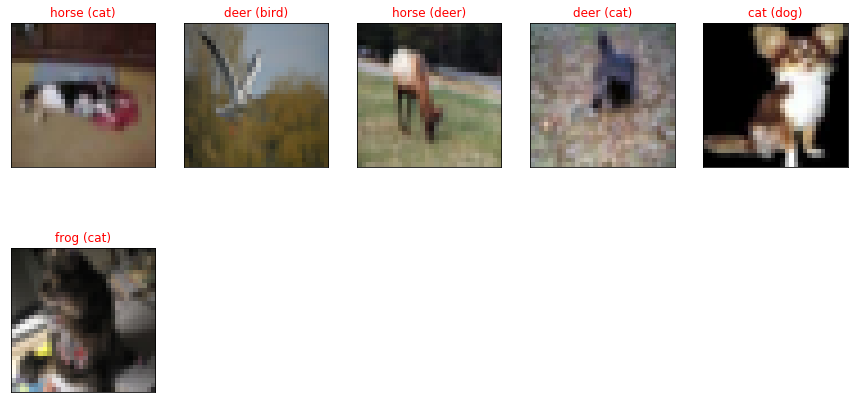

In [15]:
# obtain one batch of test images
dataiterator = iter(test_loader)
plotdata.PlotData.plotmisclassifiedimages(dataiterator=dataiterator,model=cnn_model,classes=classes)

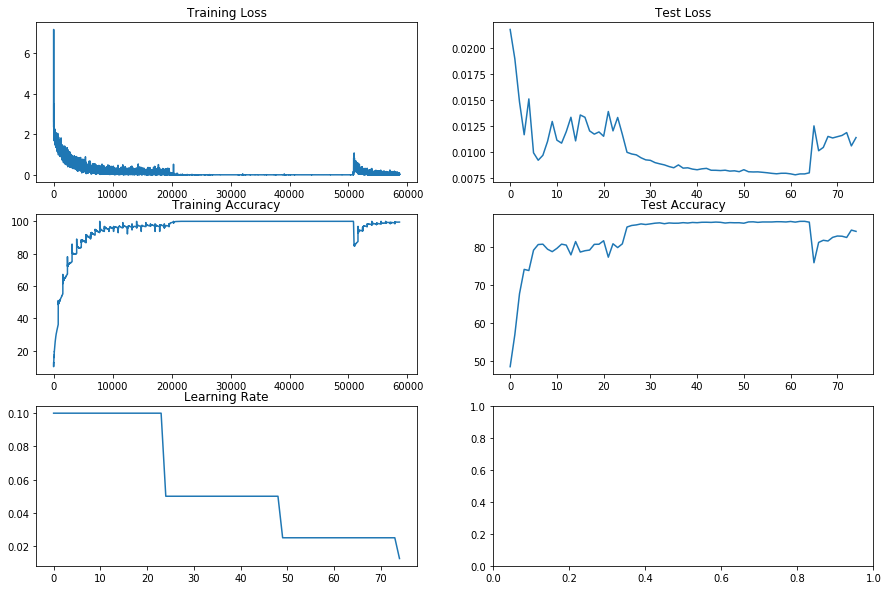

In [16]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
plotdata.PlotData.plottesttraingraph(train_losses=train_losses,train_acc=train_acc,test_losses=test_losses,
                                     test_acc=test_acc,lr_data=lr_data)

In [17]:
utils.Utils.savemodel(model=cnn_model,epoch=epochs,path="savedmodels/finalmodelwithdata.pt",optimizer_state_dict=optimizer.state_dict
                      ,train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses)

In [18]:
import torch
import src.utils.utils as utils
print(torch.cuda.is_available())
saved_data = utils.Utils.loadmodel(path="savedmodels/finalmodelwithdata.pt")

True


In [19]:
model, device = utils.Utils.createmodelresnet18()
model.load_state_dict(state_dict=saved_data['model_state_dict'])

cuda


<All keys matched successfully>

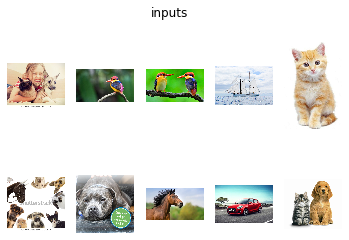

In [20]:
import glob
from PIL import Image
from src.utils.modelutils import ModelUtils

image_paths = glob.glob('./images/testimages/*.*')
images = list(map(lambda x: Image.open(x), image_paths))
ModelUtils.subplot(images, title='inputs', nrows=2, ncols=5)

In [21]:
import torchvision

inputs = [torchvision.transforms.Compose([torchvision.transforms.Resize((32, 32)), torchvision.transforms.ToTensor(),
                                          torchvision.transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])(
    x).unsqueeze(0) for x in images]  # add 1 dim for batch
inputs = [i.to(device) for i in inputs]

dog
bird
bird
ship
dog
dog
dog
horse
automobile
dog


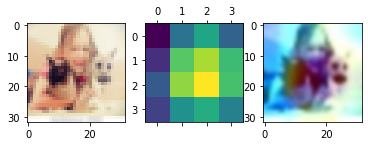

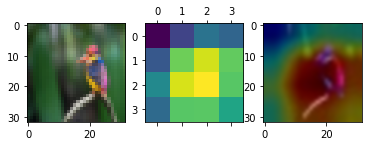

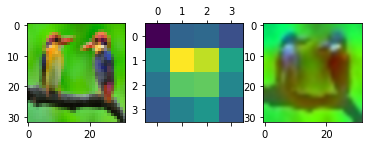

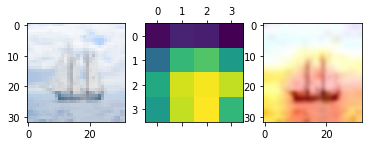

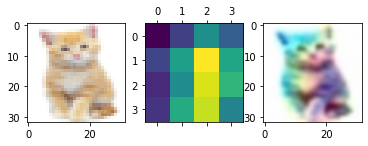

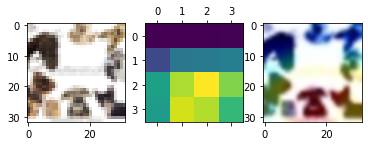

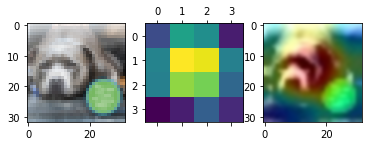

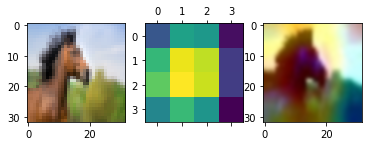

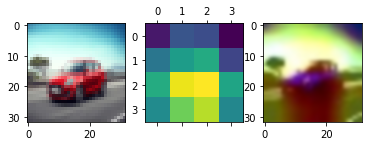

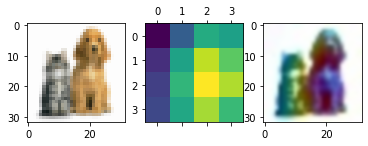

In [22]:
from src.visualization.gradcam.gradcam import gradcamof

# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

gradcamof(model,inputs,classes)